# Clasificación de imágenes de dígitos escritos a mano

Este ejemplo muestra como podemos usar la regresión logística para clasificar imágenes de dígitos del 0 al 9 escritos a mano

## Importamos librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

## Inspección de la base de datos

In [ ]:
from sklearn.datasets import load_digits # Importamos el dataset que vamos a usar

Cargamos nuestra base de datos

In [2]:
digits=load_digits()

Nuestra base de datos contiene imágenes con diferentes dígitos escritos a mano, cada uno de los ejemplares se encuentra en digits.data y los podemos observar con la función plt.imshow()

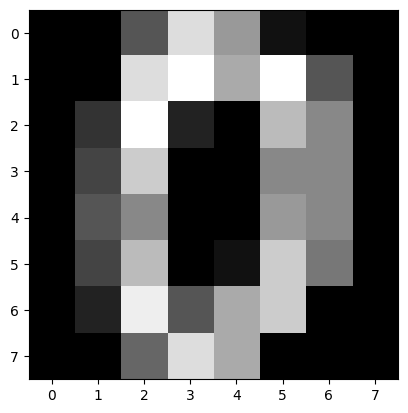

In [5]:
plt.imshow(np.reshape(digits.data[0], (8,8)),cmap='gray');

Y podemos observar la etiqueta de cada imagen en data.target

In [8]:
digits.target[0]

0

Ya con esto, el objetivo de nuestro algoritmo es lograr clasificar a partir de nuestros datos el dígito al que pertenece

## Split en train y test

Antes de crear nuestro modelo de clasificación, es necesario separar nuestros grupos de training y test para poder validarlo.

In [9]:
from sklearn.model_selection import train_test_split

Ya con la librería procedemos  a dividir los registros

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0) 

## Creación y entrenamiento del modelo

In [12]:
logreg=LogisticRegression(max_iter=10000) # Definimos el max_iter para que el modelo converja
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

## Evaluación del modelo

Ahora podemos probar que tan bien le fue a nuestro modelo 

### Accuracy

Una de las formas de evaluar el performance de nuestro modelo es con su accuracy, el cual podemos calcular con el método .score()

In [13]:
logreg.score(X_test,y_test)

0.9583333333333334

### Matriz de confusión

Otra forma más diciente es la matriz de confusión que nos muestra como fueron clasificados nuestros registros, en la diagonal nos muestra los registros clasificados correctamente 

Importamos la librería:

In [14]:
from sklearn.metrics import confusion_matrix

Evaluamos el modelo

In [16]:
cm=confusion_matrix(logreg.predict(X_test),y_test)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  1,  0,  2,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  1, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 36,  1],
       [ 0,  1,  0,  0,  0,  3,  0,  0,  0, 39]])

Una forma mas intuitiva de ver la matriz de confusión es con un heat map

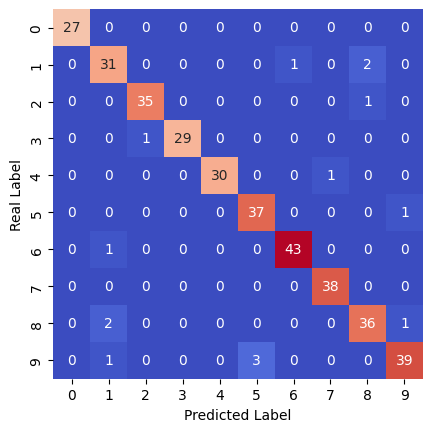

In [25]:
sns.heatmap(
    cm,
    annot=True,
    cmap='coolwarm',
    cbar=False,
    square=True
    )
plt.ylabel('Real Label')
plt.xlabel('Predicted Label');

Como podemos ver simplemente creando un algoritmo muy simple pudimos obtener muy buenos resultados.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a8c1f55-79ef-42c3-8fb6-b2930d81a137' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>